## 1. Import Modules, Load Data and Data Review

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 200)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("zingat_usecase_trainset.csv")

In [3]:
df.head()

,tarih,path,güncel_fiyat,odasayısı,brütm²,netm²,emlaktipi,binayaşı,bulunduğukat,binadakikatsayısı,isıtmatipi,banyosayisi,manzara,otopark,İnterkom,depremyönetmeliğineuygun,asansör,Çocukoyunalanı,giyinmeodası,ebeveynbanyosu,Ilan_ID
0,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,1
1,2019-01-01,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,11
2,2019-01-01,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,10
3,2019-01-01,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,8
4,2019-01-01,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   tarih                     64573 non-null  object 
 1   path                      64573 non-null  object 
 2   güncel_fiyat              64573 non-null  object 
 3   odasayısı                 64573 non-null  object 
 4   brütm²                    64573 non-null  float64
 5   netm²                     64573 non-null  float64
 6   emlaktipi                 64573 non-null  object 
 7   binayaşı                  64573 non-null  object 
 8   bulunduğukat              64573 non-null  object 
 9   binadakikatsayısı         64573 non-null  object 
 10  isıtmatipi                64573 non-null  object 
 11  banyosayisi               64573 non-null  object 
 12  manzara                   64573 non-null  object 
 13  otopark                   64573 non-null  object 
 14  İnterk

In [5]:
df.shape

(64573, 21)

In [6]:
df.isna().sum().all()

False

In [7]:
df.duplicated().any()

False

## Feature Engineering

#### Ilan_ID

In [8]:
df.Ilan_ID.nunique()

64573

In [9]:
df.drop("Ilan_ID", axis=1, inplace=True)

Ilan_ID her satırda farklı bir değer olduğu için düşürüldü

In [10]:
df.rename(columns={"path": "adres",             # Sütun isimleri kullanım kolaylığı açısından değiştirildi
                   "güncel_fiyat": "fiyat",
                   "odasayısı": "oda_sayısı",
                   "brütm²": "brüt_m2",
                   "netm²": "net_m2",
                   "emlaktipi": "emlak_tipi",
                   "binayaşı": "bina_yaşı",
                   "bulunduğukat": "bulunduğu_kat",
                   "binadakikatsayısı": "kat_sayısı",
                   "isıtmatipi": "ısıtma_tipi",
                   "banyosayisi": "banyo_sayısı",
                   "İnterkom": "interkom",
                   "depremyönetmeliğineuygun": "deprem_yönetmeliğine_uygun",
                   "Çocukoyunalanı": "çocuk_oyun_alanı",
                   "giyinmeodası": "giyinme_odası",
                   "ebeveynbanyosu": "ebeveyn_banyosu"}, inplace=True)

#### tarih

In [11]:
df['tarih'] = pd.to_datetime(df['tarih']) # Tarih sütunu yıl ve ay olmak üzere iki farklı sütuna ayrıldı
df['yıl'] = df['tarih'].apply(lambda date : date.year)
df['ay'] = df['tarih'].apply(lambda date : date.month)
df = df.drop('tarih', axis=1)
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000 TRY,5+2,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,VAR,VAR,VAR,2019,1
1,İstanbul/Kadıköy/Erenköy,547500 TRY,2+1,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,VAR,YOK,VAR,YOK,YOK,YOK,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000 TRY,3+1,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",VAR,VAR,VAR,YOK,YOK,VAR,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000 TRY,3+1,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",YOK,YOK,VAR,YOK,YOK,VAR,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000 TRY,2+1,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,VAR,YOK,VAR,YOK,VAR,VAR,2019,1


#### fiyat

In [12]:
df['fiyat'] = df['fiyat'].str.replace(' TRY', '').astype("int64") # Fiyat sütunu integer olarak değiştirild.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64573 entries, 0 to 64572
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       64573 non-null  object 
 1   fiyat                       64573 non-null  int64  
 2   oda_sayısı                  64573 non-null  object 
 3   brüt_m2                     64573 non-null  float64
 4   net_m2                      64573 non-null  float64
 5   emlak_tipi                  64573 non-null  object 
 6   bina_yaşı                   64573 non-null  object 
 7   bulunduğu_kat               64573 non-null  object 
 8   kat_sayısı                  64573 non-null  object 
 9   ısıtma_tipi                 64573 non-null  object 
 10  banyo_sayısı                64573 non-null  object 
 11  manzara                     64573 non-null  object 
 12  otopark                     64573 non-null  object 
 13  interkom                    645

#### interkom, deprem_yönetmeliğine_uygun, asansör, çocuk_oyun_alanı, giyinme_odası, ebeveyn_banyosu

In [14]:
ls = ["interkom", "deprem_yönetmeliğine_uygun", "asansör", # VAR ve YOK olarak belirtilen altı özellik 1 ve 0 olarak değiştirildi
      "çocuk_oyun_alanı", "giyinme_odası", "ebeveyn_banyosu"]
for i in ls:
    df[i] = df[i].map({'VAR': 1, 'YOK': 0})

In [15]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,İstanbul/Beylikdüzü/Adnan Kahveci,1050000,5+2,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",1,1,1,1,1,1,2019,1
1,İstanbul/Kadıköy/Erenköy,547500,2+1,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,1,0,1,0,0,0,2019,1
2,İstanbul/Beylikdüzü/Adnan Kahveci,440000,3+1,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",1,1,1,0,0,1,2019,1
3,İstanbul/Beşiktaş/Nisbetiye,1450000,3+1,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",0,0,1,0,0,1,2019,1
4,İstanbul/Beylikdüzü/Cumhuriyet,169000,2+1,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,1,0,1,0,1,1,2019,1


#### adres
Mahalleye kadar detaylı olan adres satırı sadece ilçe/mahalle kalacak şekilde sadeleştirildi

In [16]:
df.adres = df.adres.str.split('/', expand=True)[1].astype(
    str) + "/" + df.adres.str.split('/', expand=True)[2].astype(str)

#### oda_sayısı
oda_sayısı sütunu toplandı.

In [17]:
df['oda_sayısı'] = df['oda_sayısı'].replace("-","0+0")

In [18]:
df["oda_sayısı"] = df.oda_sayısı.str.split('+', expand=True)[0].astype("int64") + df.oda_sayısı.str.split('+', expand=True)[1].astype("int64") 

In [19]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,Beylikdüzü/Adnan Kahveci,1050000,7,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl","Var (Ücretsiz, Kapalı)",1,1,1,1,1,1,2019,1
1,Kadıköy/Erenköy,547500,3,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,-,1,0,1,0,0,0,2019,1
2,Beylikdüzü/Adnan Kahveci,440000,4,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir","Var (Ücretsiz, Kapalı)",1,1,1,0,0,1,2019,1
3,Beşiktaş/Nisbetiye,1450000,4,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir","Var (Ücretsiz, Açık)",0,0,1,0,0,1,2019,1
4,Beylikdüzü/Cumhuriyet,169000,3,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",Var,1,0,1,0,1,1,2019,1


#### otopark
otopark sütununda var içerenler 1 diğerleri 0 olarak düzeltildi

In [20]:
df.otopark = df.otopark.str.contains("Var").astype("int64")

In [21]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay
0,Beylikdüzü/Adnan Kahveci,1050000,7,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl",1,1,1,1,1,1,1,2019,1
1,Kadıköy/Erenköy,547500,3,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,0,1,0,1,0,0,0,2019,1
2,Beylikdüzü/Adnan Kahveci,440000,4,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir",1,1,1,1,0,0,1,2019,1
3,Beşiktaş/Nisbetiye,1450000,4,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir",1,0,0,1,0,0,1,2019,1
4,Beylikdüzü/Cumhuriyet,169000,3,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",1,1,0,1,0,1,1,2019,1


#### manzara
manzaralar ayrı sütunlara ayrıldı manzara değeri olmayanlar bilinmiyor olarak değiştirildi

In [22]:
df.manzara.value_counts()

_                                                                        41713
Şehir                                                                     7631
Doğa,Şehir                                                                2092
Cadde,Şehir                                                               1018
Boğaz,Cadde,Deniz,Havuz,Park,Şehir,Yeşil Alan,Göl,Nehir,Vadi,Dağ,Doğa      960
                                                                         ...  
Deniz,Yeşil Alan,Vadi,Havuz,Doğa,Park                                        1
Deniz,Yeşil Alan,Havuz,Doğa,Park                                             1
Cadde,Park,Şehir,Yeşil Alan,Göl,Nehir                                        1
Göl,Dağ                                                                      1
Yeşil Alan,Boğaz,Deniz,Park,Şehir                                            1
Name: manzara, Length: 917, dtype: int64

In [23]:
df["manzara_boğaz"] = 0
df["manzara_cadde"] = 0
df["manzara_dağ"] = 0
df["manzara_deniz"] = 0
df["manzara_doğa"] = 0
df["manzara_göl"] = 0
df["manzara_havuz"] = 0
df["manzara_nehir"] = 0
df["manzara_park"] = 0
df["manzara_şehir"] = 0
df["manzara_vadi"] = 0
df["manzara_yeşilalan"] = 0
df["manzara_bilinmiyor"] = 0

In [24]:
for i in range(df.shape[0]):
    if "Boğaz" in df.manzara[i]:
        df.manzara_boğaz[i] = 1
    if "Cadde" in df.manzara[i]:
        df.manzara_cadde[i] = 1
    if "Dağ" in df.manzara[i]:
        df.manzara_dağ[i] = 1
    if "Deniz" in df.manzara[i]:
        df.manzara_deniz[i] = 1
    if "Doğa" in df.manzara[i]:
        df.manzara_doğa[i] = 1
    if "Göl" in df.manzara[i]:
        df.manzara_göl[i] = 1
    if "Havuz" in df.manzara[i]:
        df.manzara_havuz[i] = 1
    if "Nehir" in df.manzara[i]:
        df.manzara_nehir[i] = 1
    if "Park" in df.manzara[i]:
        df.manzara_park[i] = 1
    if "Şehir" in df.manzara[i]:
        df.manzara_şehir[i] = 1
    if "Vadi" in df.manzara[i]:
        df.manzara_vadi[i] = 1
    if "Yeşil Alan" in df.manzara[i]:
        df.manzara_yeşilalan[i] = 1
    if "_" in df.manzara[i]:
        df.manzara_bilinmiyor[i] = 1

In [25]:
df.head()

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,manzara,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
0,Beylikdüzü/Adnan Kahveci,1050000,7,380.0,370.0,Daire,16-20 arası,12,10-20 arası,Kombi (Doğalgaz),3,"Cadde,Deniz,Göl",1,1,1,1,1,1,1,2019,1,0,1,0,1,0,1,0,0,0,0,0,0,0
1,Kadıköy/Erenköy,547500,3,65.0,55.0,Daire,0,1,7,Kombi (Doğalgaz),1,_,0,1,0,1,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,Beylikdüzü/Adnan Kahveci,440000,4,205.0,197.0,Daire,11-15 arası,2,10-20 arası,Kombi (Doğalgaz),2,"Cadde,Şehir",1,1,1,1,0,0,1,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,Beşiktaş/Nisbetiye,1450000,4,150.0,130.0,Daire,26-30 arası,3,5,Merkezi Sistem (Isı Payı Ölçer),2,"Cadde,Şehir",1,0,0,1,0,0,1,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,Beylikdüzü/Cumhuriyet,169000,3,70.0,65.0,Daire,1,Kot 1,6,Kombi (Doğalgaz),1,"Boğaz,Deniz,Göl,Doğa",1,1,0,1,0,1,1,2019,1,1,0,0,1,1,1,0,0,0,0,0,0,0


In [26]:
df.drop("manzara", axis=1, inplace=True)

### Data Cleaning

#### Adres

In [27]:
df = df.groupby('adres').filter(lambda x : len(x)>=20)

In [28]:
df.shape

(62551, 33)

Adres olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

#### oda_sayısı

In [29]:
df.oda_sayısı.value_counts()

4       24504
3       23025
5        5538
2        4907
6        2511
7        1050
8         393
1         269
9         144
10        105
0          36
11         23
12         17
1149       13
14          8
13          5
23          2
25          1
Name: oda_sayısı, dtype: int64

In [30]:
df = df.groupby('oda_sayısı').filter(lambda x : len(x)>=20)

In [31]:
df.oda_sayısı.value_counts()

4     24504
3     23025
5      5538
2      4907
6      2511
7      1050
8       393
1       269
9       144
10      105
0        36
11       23
Name: oda_sayısı, dtype: int64

oda sayısı olarak eğitime yeterli sayıda verisi olmayan değerler düşürüldü

In [32]:
df.reset_index(drop=True, inplace=True)

#### brüt_m2

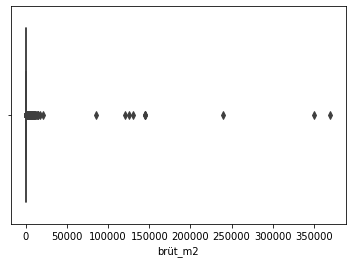

In [33]:
sns.boxplot(df.brüt_m2);

In [34]:
df[df.brüt_m2 < df.net_m2]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
5109,Beşiktaş/Bebek,45000000,9,1.0,950.0,Villa,21-25 arası,Müstakil,4,Klima,4,1,1,0,1,0,1,1,2019,2,1,0,0,1,1,0,0,0,0,0,0,0,0
6256,Çeşme/Dalyan,1250000,4,120.0,300.0,Villa,6-10 arası,-,2,-,2,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
8598,Beşiktaş/Ulus,27000000,6,1.0,309.0,Villa,16-20 arası,Müstakil,3,Kombi (Doğalgaz),3,1,0,0,0,0,0,0,2019,3,0,0,0,0,1,0,0,0,0,0,0,0,0
12573,Çeşme/Ardıç,17000000,6,1.0,300.0,Villa,6-10 arası,Müstakil,2,Kat Kaloriferi,5,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
12582,Çeşme/Ilıca,3900000,7,1.0,350.0,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
12586,Çeşme/Musalla,12900000,9,5.0,550.0,Köşk / Konak / Yalı,0,-,2,Yerden Isıtma,6 ve üzeri,0,0,0,0,0,0,1,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
14318,Karabağlar/Refet Bele,235000,3,98.0,100.0,Daire,5,3,3,Kombi (Doğalgaz),1,0,1,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
16070,Çeşme/Ilıca,3900000,7,1.0,350.0,Villa,6-10 arası,Müstakil,2,Klima,6 ve üzeri,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1
33081,Seferihisar/Cumhuriyet,250000,3,70.0,90.0,Yazlık,11-15 arası,Bahçe katı,3,Klima,1,0,0,0,0,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1
33109,Seferihisar/Bengiler,310000,3,70.0,100.0,Yazlık,16-20 arası,Komple,2,Yok,1,0,0,0,0,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1


In [35]:
for i in range(df.shape[0]):
    if df.brüt_m2.iloc[i] < df.net_m2.iloc[i]:
        df.brüt_m2.iloc[i] = df.net_m2.iloc[i]

Brüt metrekare net metkrekareden küçük olamayacağı için bu durumda olan satırlarda ikisi eşitlendi

In [36]:
df[((df.brüt_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
317,Beylikdüzü/Kavaklı,445000,5,10.0,1.0,Daire,-,-,-,-,2,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1911,Beylikdüzü/Adnan Kahveci,215000,3,2.0,1.0,Daire,0,5,9,Kombi (Doğalgaz),1,0,1,1,1,1,1,1,2019,1,0,1,0,0,0,0,1,0,1,1,0,1,0
4915,Beşiktaş/Bebek,175000000,0,1.0,1.0,Villa,26-30 arası,Bahçe katı,4,Klima,6 ve üzeri,1,1,0,0,0,1,1,2019,2,1,0,0,1,1,0,0,0,0,1,0,0,0
59570,Beylikdüzü/Yakuplu,139000,3,11.0,5.0,Daire,0,2,10,Kombi (Doğalgaz),1,1,1,1,1,1,1,1,2020,3,1,1,1,1,1,1,1,1,1,1,1,1,0


In [37]:
df = df[~((df.brüt_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

In [38]:
df.reset_index(drop=True, inplace=True)

In [39]:
df[(df.brüt_m2 > 10000) & (df.emlak_tipi != "Çiftlik Evi")]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
3883,Beylikdüzü/Cumhuriyet,209000,3,10090.0,90.0,Daire,0,2,4,Kombi (Doğalgaz),1,0,1,0,1,0,0,0,2019,1,0,1,0,0,0,0,0,0,0,1,0,0,0
5585,Urla/Yelaltı,750000,3,17000.0,45.0,Prefabrik Ev,-,-,1,Güneş Enerjisi,1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6105,Kadıköy/Bostancı,1250000,4,15011.0,117.0,Daire,1,1,8,Merkezi Sistem (Isı Payı Ölçer),2,1,1,1,1,0,0,1,2019,2,0,1,0,0,0,0,0,0,0,1,0,0,0
9193,Buca/Yenigün,232500,4,12011.0,110.0,Daire,16-20 arası,2,4,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9574,Buca/İnkılap,350000,4,125120.0,120.0,Daire,3,3,5,Kombi (Doğalgaz),2,1,1,1,1,0,0,1,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
12704,Torbalı/Muratbey,220000,4,145000.0,145000.0,Daire,6-10 arası,5,5,Kombi (Doğalgaz),2,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
25394,Torbalı/Ayrancılar,235000,4,145000.0,130.0,Daire,6-10 arası,5,7,Klima,2,0,0,0,0,0,0,0,2019,7,0,0,0,0,0,0,0,0,0,0,0,0,1
30012,Karşıyaka/Bostanlı,600000,4,120110.0,110.0,Daire,0,2,5,Kombi (Doğalgaz),2,0,1,1,1,0,0,0,2019,9,0,0,0,0,0,0,0,0,0,0,0,0,1
36306,Bağcılar/Barbaros,800000,8,350350.0,300.0,Daire,-,-,-,-,2,0,0,0,0,0,0,0,2019,10,0,0,0,0,0,0,0,0,0,0,0,0,1
39456,Pendik/Kurtköy,260000,3,11010.0,100.0,Daire,6-10 arası,Bahçe katı,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,11,0,0,0,0,0,0,0,0,0,0,0,0,1


In [40]:
df.brüt_m2.iloc[3883] = df.net_m2.iloc[3883]
df.brüt_m2.iloc[5585] = df.net_m2.iloc[5585]
df.brüt_m2.iloc[6105] = df.net_m2.iloc[6105]
df.brüt_m2.iloc[9193] = df.net_m2.iloc[9193]
df.brüt_m2.iloc[9574] = df.net_m2.iloc[9574]
df.brüt_m2.iloc[12704] = df.net_m2.iloc[12704] = 145
df.brüt_m2.iloc[25394] = df.net_m2.iloc[25394]
df.brüt_m2.iloc[30012] = df.net_m2.iloc[30012]
df.brüt_m2.iloc[36306] = df.net_m2.iloc[36306]
df.brüt_m2.iloc[39456] = df.net_m2.iloc[39456]
df.brüt_m2.iloc[40850] = df.net_m2.iloc[40850]
df.brüt_m2.iloc[45036] = df.net_m2.iloc[45036] = 125
df.brüt_m2.iloc[46874] = df.net_m2.iloc[46874]
df.brüt_m2.iloc[47309] = df.net_m2.iloc[47309]
df.brüt_m2.iloc[49375] = df.net_m2.iloc[49375]
df.brüt_m2.iloc[52827] = df.net_m2.iloc[52827]
df.brüt_m2.iloc[58154] = df.net_m2.iloc[58154]

In [41]:
df.drop(58587, inplace=True)

Yanlış giriş olduğu düşünülen brüt_m2 değerleri düzeltildi

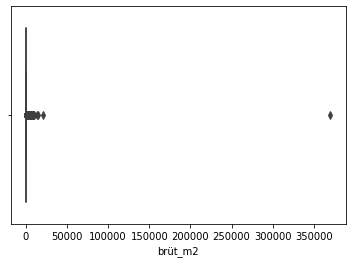

In [42]:
sns.boxplot(df.brüt_m2);

In [43]:
df = df[~(df.brüt_m2 > 50000)] #outlier değer düşürüldü

#### net_m2

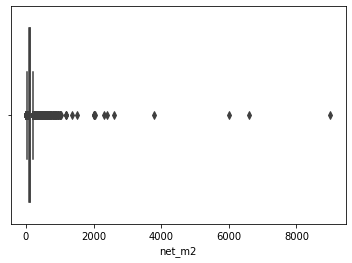

In [44]:
sns.boxplot(df.net_m2);

In [45]:
df[((df.net_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
3926,Beylikdüzü/Cumhuriyet,130000,3,95.0,8.0,Daire,0,Bahçe katı,4,Kombi (Doğalgaz),1,0,1,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3971,Bağcılar/Çınar,178000,3,95.0,10.0,Daire,16-20 arası,-,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
3980,Bağcılar/Merkez,185000,3,95.0,10.0,Daire,21-25 arası,2,6,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6680,Seferihisar/Payamlı,330000,4,130.0,1.0,Yazlık,6-10 arası,Müstakil,3,Yok,3,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
8994,Bağcılar/Yıldıztepe,245000,3,110.0,10.0,Daire,5,-,5,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9005,Bornova/Kazımdirik,225000,1,22.0,17.0,Daire,0,1,7,Klima,1,1,0,0,1,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9019,Bornova/Kazımdirik,225000,1,22.0,17.0,Daire,0,2,7,Klima,1,1,0,0,1,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
9435,Pendik/Çamçeşme,480000,4,3540.0,3.0,Çiftlik Evi,0,-,3,Yok,2,0,0,1,0,0,0,0,2019,3,0,1,0,0,1,0,0,0,0,1,0,0,0
11423,Beşiktaş/Vişnezade,132500000,11,1300.0,1.0,Rezidans,11-15 arası,20 ve üzeri,20 ve üzeri,Fancoil,6 ve üzeri,1,1,0,0,0,0,1,2019,4,1,0,0,1,0,0,0,0,0,1,0,0,0
14925,Beylikdüzü/Beylikdüzü OSB,198000,4,110.0,12.0,Daire,0,Kot 3,9,Kombi (Doğalgaz),1,0,0,0,0,0,0,0,2019,5,0,0,0,0,0,0,0,0,0,0,0,0,1


In [46]:
df = df[~((df.net_m2 < 20) & (df.emlak_tipi != "Prefabrik Ev"))]

In [47]:
df.reset_index(drop=True, inplace=True)

In [48]:
df[(df.net_m2 > 2500)] 

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
10871,Urla/Yelaltı,2900000,10,6625.0,6600.0,Çiftlik Evi,-,-,-,-,3,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1
14344,Çeşme/Ovacık,6000000,9,6000.0,5999.0,Müstakil Ev,-,-,-,-,1,0,0,0,0,0,0,0,2019,4,0,0,0,0,0,0,0,0,0,0,0,0,1
41641,Kemalpaşa/Yukarıkızılca Merkez,3000000,4,9100.0,9000.0,Daire,-,-,-,-,1,0,0,0,0,0,0,0,2019,11,0,0,0,0,0,0,0,0,0,0,0,0,1
51720,Urla/Denizli,15800000,8,3793.0,3790.0,Villa,-,-,-,-,5,0,0,0,0,0,0,0,2020,2,0,0,0,0,0,0,0,0,0,0,0,0,1
53086,Urla/Yelaltı,3500000,5,2700.0,2600.0,Villa,4,Müstakil,1,Klima,3,0,0,0,0,0,0,0,2020,2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
df.drop(41641, inplace=True)

In [50]:
df.reset_index(drop=True, inplace=True)

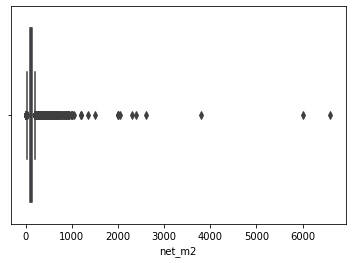

In [51]:
sns.boxplot(df.net_m2);

#### Fiyat

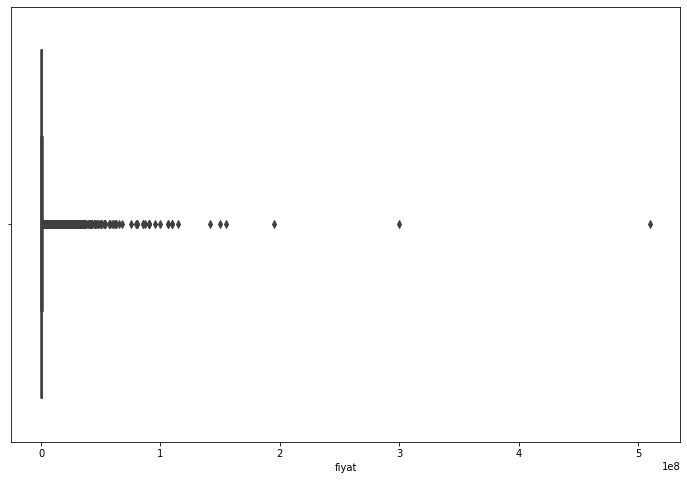

In [52]:
plt.figure(figsize=(12,8))
sns.boxplot(df.fiyat);

In [53]:
df[((df.fiyat < 10000) & (df.emlak_tipi != "Prefabrik Ev"))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
26,Menderes/Kemalpaşa,900,3,85.0,80.0,Daire,0,Yüksek Giriş,3,Kombi (Doğalgaz),1,0,0,1,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
130,Beylikdüzü/Cumhuriyet,1300,3,110.0,100.0,Daire,0,2,10-20 arası,Kombi (Doğalgaz),1,1,1,1,1,1,0,0,2019,1,0,1,0,0,0,0,0,0,1,1,0,0,0
135,Kadıköy/Bostancı,2800,4,145.0,110.0,Daire,4,4,7,Merkezi Sistem,1,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2927,Beylikdüzü/Gürpınar,2100,3,175.0,160.0,Daire,0,2,6,Kombi (Doğalgaz),2,0,1,1,1,0,0,1,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3067,Karşıyaka/Aksoy,2200,3,90.0,85.0,Daire,0,1,5,Kombi (Doğalgaz),1,1,1,1,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3965,Buca/Yiğitler,1200,3,110.0,100.0,Daire,16-20 arası,4,4,Kombi (Doğalgaz),1,0,1,1,1,1,1,1,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
5933,Balçova/Korutürk,6000,8,400.0,380.0,Daire,11-15 arası,4,4,Jeotermal,4,0,0,0,0,0,0,0,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
6924,Buca/Güven,1200,3,100.0,90.0,Daire,2,1,4,Kombi (Doğalgaz),1,0,1,0,1,1,1,1,2019,2,0,0,0,0,0,0,0,0,0,0,0,0,1
7059,Pendik/Güllü Bağlar,450,3,105.0,95.0,Daire,0,1,10,Merkezi Sistem (Isı Payı Ölçer),1,1,1,1,1,1,0,0,2019,2,0,0,0,0,0,0,0,0,0,1,0,0,0
8298,Buca/Kuruçeşme,800,3,90.0,85.0,Daire,3,Giriş Katı,2,Soba (Kömür),1,0,0,0,0,0,0,0,2019,3,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df = df[~((df.fiyat < 10000) & (df.emlak_tipi != "Prefabrik Ev"))]

In [55]:
df.reset_index(drop=True, inplace=True)

In [56]:
df.shape

(62413, 33)

In [57]:
df[((df.fiyat > 30000000) & (df.emlak_tipi == "Daire") & (df.net_m2 < 200))]

,adres,fiyat,oda_sayısı,brüt_m2,net_m2,emlak_tipi,bina_yaşı,bulunduğu_kat,kat_sayısı,ısıtma_tipi,banyo_sayısı,otopark,interkom,deprem_yönetmeliğine_uygun,asansör,çocuk_oyun_alanı,giyinme_odası,ebeveyn_banyosu,yıl,ay,manzara_boğaz,manzara_cadde,manzara_dağ,manzara_deniz,manzara_doğa,manzara_göl,manzara_havuz,manzara_nehir,manzara_park,manzara_şehir,manzara_vadi,manzara_yeşilalan,manzara_bilinmiyor
2529,Bağcılar/Merkez,510000000,4,180.0,170.0,Daire,16-20 arası,2,5,Kalorifer (Doğalgaz),1,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3208,Bağcılar/Merkez,300000000,4,140.0,130.0,Daire,-,2,5,Kalorifer (Doğalgaz),2,0,0,0,0,0,0,0,2019,1,0,0,0,0,0,0,0,0,0,0,0,0,1
55414,Beylikdüzü/Beylikdüzü OSB,85500000,2,95.0,65.0,Daire,0,Bahçe katı,7,Klima,1,1,0,0,1,0,1,1,2020,2,0,0,0,0,0,1,0,0,0,0,0,0,0
60874,Bağcılar/Yavuz Selim,110000000,3,100.0,90.0,Daire,16-20 arası,Çatı Katı,6,Soba (Kömür),1,0,0,0,0,0,0,0,2020,4,0,0,0,0,0,0,0,0,0,0,0,0,1


In [58]:
df = df[~((df.fiyat > 30000000) & (df.emlak_tipi == "Daire") & (df.net_m2 < 200))]

In [59]:
df.reset_index(drop=True, inplace=True)

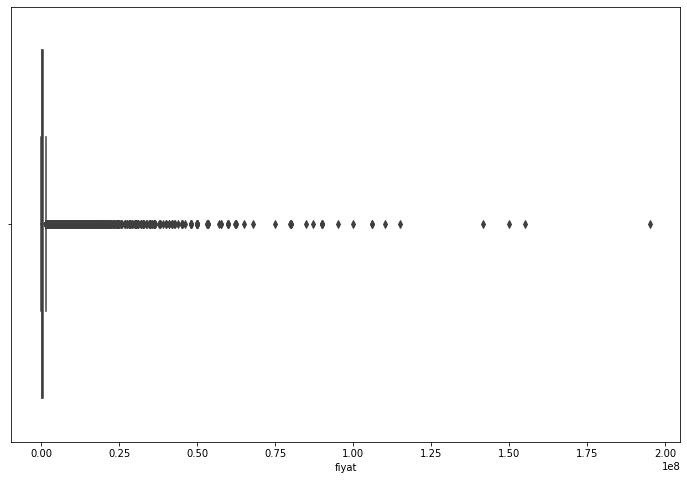

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(df.fiyat);

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62409 entries, 0 to 62408
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       62409 non-null  object 
 1   fiyat                       62409 non-null  int64  
 2   oda_sayısı                  62409 non-null  int64  
 3   brüt_m2                     62409 non-null  float64
 4   net_m2                      62409 non-null  float64
 5   emlak_tipi                  62409 non-null  object 
 6   bina_yaşı                   62409 non-null  object 
 7   bulunduğu_kat               62409 non-null  object 
 8   kat_sayısı                  62409 non-null  object 
 9   ısıtma_tipi                 62409 non-null  object 
 10  banyo_sayısı                62409 non-null  object 
 11  otopark                     62409 non-null  int64  
 12  interkom                    62409 non-null  int64  
 13  deprem_yönetmeliğine_uygun  624

In [62]:
df.oda_sayısı = df.oda_sayısı.astype("int64")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62409 entries, 0 to 62408
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   adres                       62409 non-null  object 
 1   fiyat                       62409 non-null  int64  
 2   oda_sayısı                  62409 non-null  int64  
 3   brüt_m2                     62409 non-null  float64
 4   net_m2                      62409 non-null  float64
 5   emlak_tipi                  62409 non-null  object 
 6   bina_yaşı                   62409 non-null  object 
 7   bulunduğu_kat               62409 non-null  object 
 8   kat_sayısı                  62409 non-null  object 
 9   ısıtma_tipi                 62409 non-null  object 
 10  banyo_sayısı                62409 non-null  object 
 11  otopark                     62409 non-null  int64  
 12  interkom                    62409 non-null  int64  
 13  deprem_yönetmeliğine_uygun  624

<AxesSubplot:>

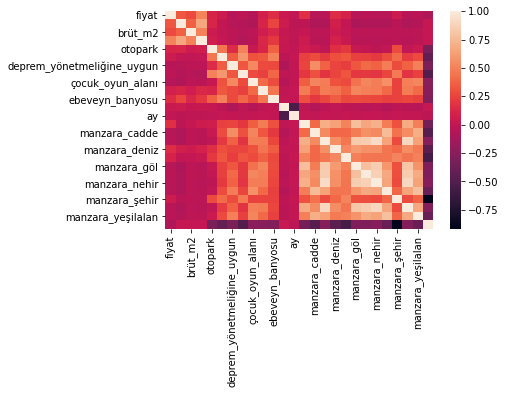

In [64]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='fiyat', ylabel='Density'>

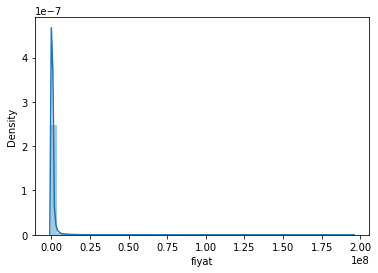

In [65]:
sns.distplot(df.fiyat)

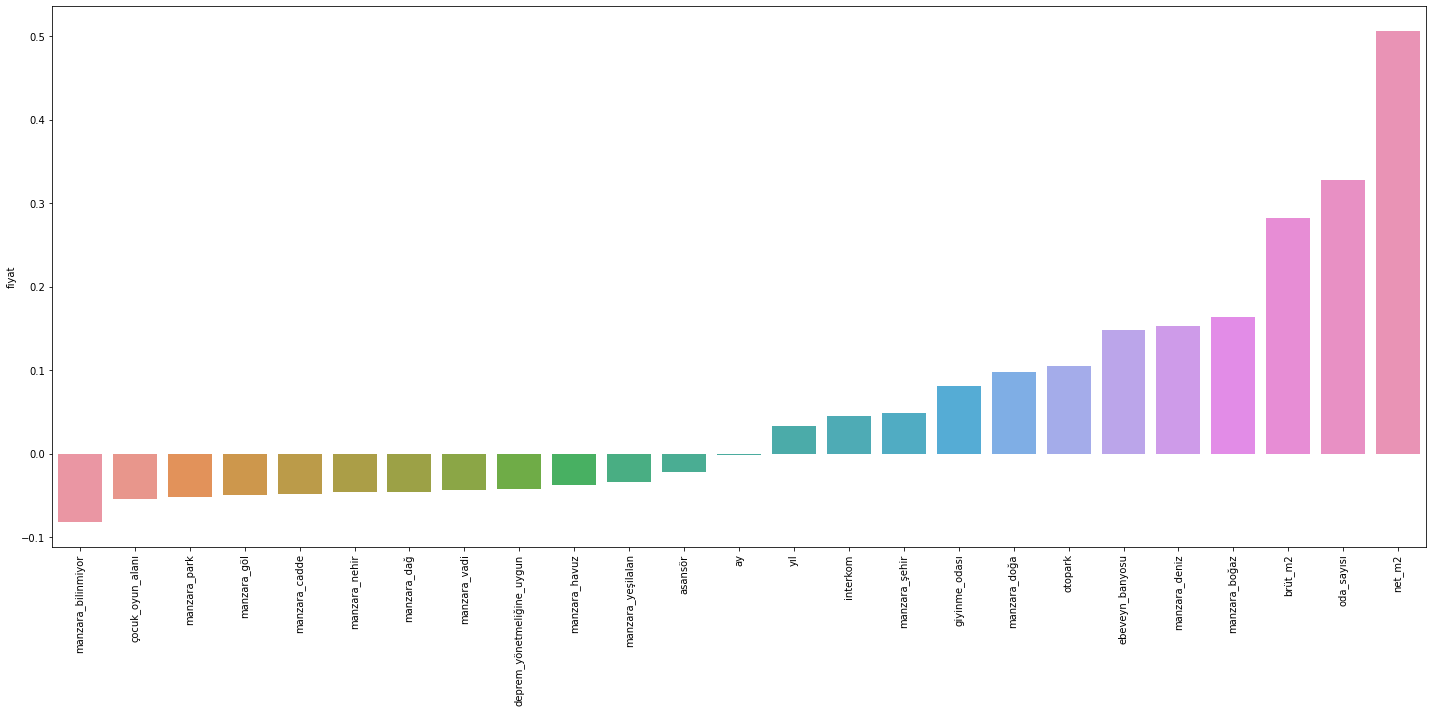

In [66]:
corr_by_price = df.corr()["fiyat"].sort_values()[:-1]

plt.figure(figsize=(20, 10))
sns.barplot(x=corr_by_price.index, y=corr_by_price)
plt.xticks(rotation=90)
plt.tight_layout()

In [67]:
df = pd.get_dummies(data=df, columns=["adres", 
                                 "emlak_tipi", 
                                 "bina_yaşı", 
                                 "bulunduğu_kat", 
                                "kat_sayısı",
                                "ısıtma_tipi",
                                "banyo_sayısı"], drop_first=True)

## Data Pre-processing

#### Train-Test Split

In [68]:
X = df.drop("fiyat", axis=1)
y = df["fiyat"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

#### Scaler

In [70]:
scaler = RobustScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<IPython.core.display.Javascript object>

#### Evaluation Metrics

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n", "rmse:", rmse)

#### Linear Regression

In [74]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs=-1)
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5548499943899625 
 mae: 583116.6737702211 
 mse: 5977973236416.677 
 rmse: 2444989.4143772232


#### Ridge Regression

In [75]:
from sklearn.linear_model import Ridge
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.554414039734477 
 mae: 582318.5500170055 
 mse: 5983827724184.71 
 rmse: 2446186.363338801


#### Lasso Regression

In [76]:
from sklearn.linear_model import Lasso, LassoCV
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.5548526336609775 
 mae: 583013.2467096081 
 mse: 5977937793327.175 
 rmse: 2444982.1662595365


In [77]:
alpha_space = np.linspace(1330, 1340, 100)
alpha_space

array([1330.        , 1330.1010101 , 1330.2020202 , 1330.3030303 ,
       1330.4040404 , 1330.50505051, 1330.60606061, 1330.70707071,
       1330.80808081, 1330.90909091, 1331.01010101, 1331.11111111,
       1331.21212121, 1331.31313131, 1331.41414141, 1331.51515152,
       1331.61616162, 1331.71717172, 1331.81818182, 1331.91919192,
       1332.02020202, 1332.12121212, 1332.22222222, 1332.32323232,
       1332.42424242, 1332.52525253, 1332.62626263, 1332.72727273,
       1332.82828283, 1332.92929293, 1333.03030303, 1333.13131313,
       1333.23232323, 1333.33333333, 1333.43434343, 1333.53535354,
       1333.63636364, 1333.73737374, 1333.83838384, 1333.93939394,
       1334.04040404, 1334.14141414, 1334.24242424, 1334.34343434,
       1334.44444444, 1334.54545455, 1334.64646465, 1334.74747475,
       1334.84848485, 1334.94949495, 1335.05050505, 1335.15151515,
       1335.25252525, 1335.35353535, 1335.45454545, 1335.55555556,
       1335.65656566, 1335.75757576, 1335.85858586, 1335.95959

In [78]:
lasso_cv_model = LassoCV(alphas=alpha_space,  cv=10,
                         max_iter=100000, n_jobs=-1).fit(X_train, y_train)

In [79]:
lasso_cv_model.alpha_

1330.0

In [80]:
y_pred = lasso_cv_model.predict(X_test)

In [81]:
eval_metrics(y_test, y_pred)

r2_score: 0.545383988174013 
 mae: 573293.2974360136 
 mse: 6105093378170.134 
 rmse: 2470848.716164171


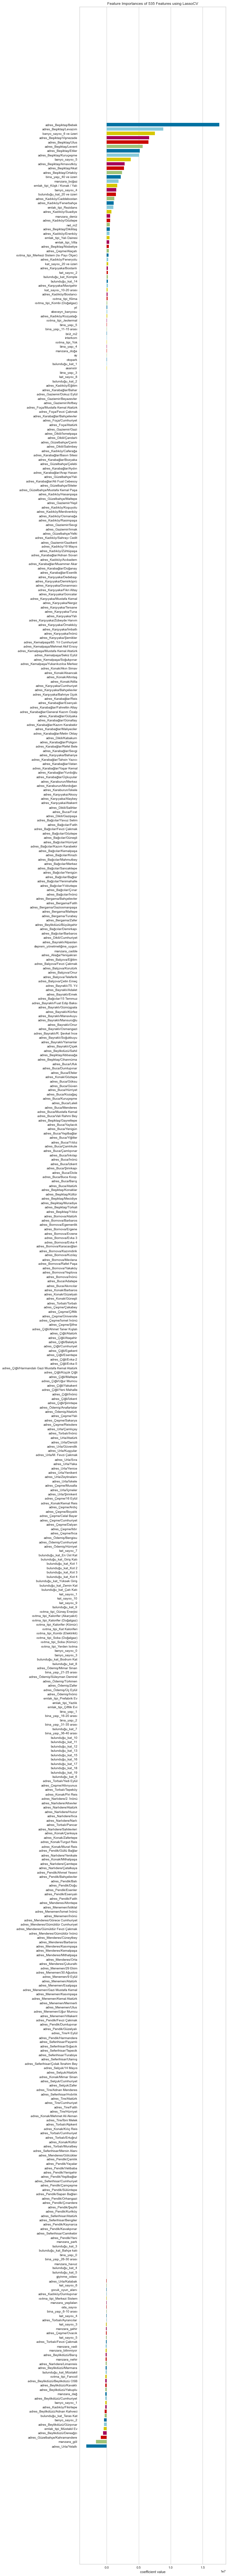

In [87]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(lasso_cv_model, labels=X.columns, relative=False)
visualizer = RadViz(size=(720, 8000))
viz.fit(X_train, y_train)
viz.show();

#### RandomForest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8198169365041363 
 mae: 270560.5044491147 
 mse: 2419700140759.815 
 rmse: 1555538.537214625


#### XGBoost

In [83]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_jobs=-1)
xgb_model.fit(X_train, y_train)
y_pred= xgb_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.842771707471104 
 mae: 301770.93014878925 
 mse: 2111437746602.242 
 rmse: 1453078.7131474474


#### CatBoost

In [84]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor(verbose=False)
cb_model.fit(X_train, y_train)
y_pred= cb_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8377129661203716 
 mae: 307847.60287999397 
 mse: 2179372195717.1863 
 rmse: 1476269.689358007
